# Climate Change Analysis 
* Student name: Chris Hollman
* Student pace: Self paced
* Scheduled review date/time: 
* Instructor name: Abhineet Kulkarni

## Project Overview
The goal of this project is to study the trends of our global climate. This will include an analysis of historical data, a prediction of future trends, and a regresssion model to determine associated factors. 

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
sns.set_style('darkgrid')
from prophet import Prophet
import datetime
import warnings

In [158]:
country_df = pd.read_csv('data/GlobalLandTemperaturesByCountry.csv')
global_df = pd.read_csv('data/GlobalTemperatures.csv')
hist_gas_df = pd.read_csv('data/historical_emissions.csv')
pop_df = pd.read_csv('data/20_year_world_pop.csv')
gdp_df = pd.read_csv('data/gdp_growth.csv')
    

## Initial Data Exploration

In [159]:
global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [160]:
global_df['dt'] = pd.to_datetime(global_df['dt'])

In [161]:
print(global_df['LandAverageTemperatureUncertainty'].max())
print(global_df['LandAverageTemperatureUncertainty'].min())

7.88
0.034


In [162]:
global_df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
global_df.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [164]:
grouped = global_df.groupby(pd.Grouper(key='dt', freq='Y')).mean()
grouped.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,266.000000,266.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,8.369337,0.945719,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,0.584921,0.994110,0.447741,0.549759,0.614124,0.406697,0.298629,0.071441
min,5.779833,0.062083,13.081000,0.078500,1.525083,0.102500,14.740083,0.047500
25%,8.081563,0.210208,14.055917,0.139542,2.262562,0.149896,14.991208,0.062937
50%,8.372167,0.405583,14.307708,0.240125,2.734917,0.274667,15.144208,0.123625
75%,8.704167,1.629563,14.539167,0.508000,3.126833,0.437000,15.379104,0.150229
max,9.831000,4.026000,15.572667,2.619250,4.148833,1.778500,16.058583,0.316417


In [165]:
global_df[global_df['LandAverageTemperatureUncertainty'] > 1.6]['dt'].max()

Timestamp('1846-04-01 00:00:00')

In [166]:
global_df = global_df[global_df['dt'] >= '1847']

In [167]:
global_df['LandAverageTemperatureF'] = global_df['LandAverageTemperature']*1.8+32

In [169]:
global_df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,LandAverageTemperatureF
1164,1847-01-01,2.753,1.269,NaN,NaN,NaN,NaN,NaN,NaN,36.9554
1165,1847-02-01,3.602,1.383,NaN,NaN,NaN,NaN,NaN,NaN,38.4836
1166,1847-03-01,4.046,1.583,NaN,NaN,NaN,NaN,NaN,NaN,39.2828
1167,1847-04-01,7.980,0.998,NaN,NaN,NaN,NaN,NaN,NaN,46.3640
1168,1847-05-01,10.622,0.752,NaN,NaN,NaN,NaN,NaN,NaN,51.1196


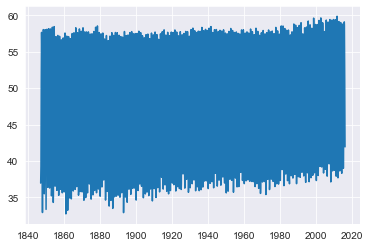

In [170]:
X = global_df['dt']
y = global_df['LandAverageTemperatureF']
plt.plot(X,y)

## Cleaning/Preprocessing